In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer

## Read Data From File

In [30]:
data = pd.read_csv('../data/training_data.csv', index_col=0)
data.fillna(0, inplace=True)

In [31]:
data.head()

,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2,79,1970379,0,0,0,0,2566242,928419,0,...,0,0,0,0,7758,17442,0,0,0,240167
defunkt,2,1,4609687,0,0,0,0,0,470103,0,...,0,0,0,0,6399,23938,0,0,0,896415
wycats,1,358,3378185,0,0,0,0,2687760,952,0,...,0,0,0,0,21641,441513,0,0,0,3060
brynary,1,3483,11661,0,0,0,0,0,951748,0,...,0,0,0,0,0,17954,0,0,0,3142
kevinclark,1,18,0,0,0,0,0,0,43311,4285,...,0,0,0,0,0,0,0,0,0,8688


In [32]:
data.describe()

,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
count,291.000000,291.000000,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,2.910000e+02,...,291.000000,2.910000e+02,2.910000e+02,291.000000,2.910000e+02,2.910000e+02,291.000000,291.0,291.000000,2.910000e+02
mean,1.505155,589.731959,7.757958e+05,3.454239e+05,3.363875e+05,2.236729e+05,6.120479e+05,1.414856e+05,3.724520e+05,6.657735e+05,...,138.010309,8.739952e+03,1.818665e+04,5.189003,7.203062e+04,1.058439e+07,25.910653,0.0,82.048110,1.325632e+06
std,0.500835,1037.710220,3.716412e+06,1.832573e+06,2.234304e+06,3.580910e+06,5.284122e+06,9.043241e+05,2.625058e+06,7.238237e+06,...,2186.139530,9.305277e+04,2.328988e+05,72.935933,4.456067e+05,1.746386e+08,442.002628,0.0,996.248541,6.704554e+06
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00
25%,1.000000,13.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,7.115000e+02
50%,2.000000,171.000000,3.380000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,1.050000e+02,1.240000e+03,0.000000,0.0,0.000000,1.455900e+04
75%,2.000000,732.500000,4.828450e+04,3.942400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.594000e+03,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000,7.439500e+03,2.320950e+04,0.000000,0.0,0.000000,1.847515e+05
max,2.000000,10101.000000,3.569445e+07,2.512469e+07,2.437064e+07,6.107561e+07,6.941750e+07,1.373544e+07,2.956231e+07,1.221512e+08,...,37184.000000,1.418970e+06,3.898512e+06,1229.000000,5.116895e+06,2.979217e+09,7540.000000,0.0,13480.000000,6.681048e+07


In [33]:
data.mean()

Id               1.505155e+00
Contributions    5.897320e+02
JavaScript       7.757958e+05
Python           3.454239e+05
Java             3.363875e+05
C#               2.236729e+05
PHP              6.120479e+05
TypeScript       1.414856e+05
Ruby             3.724520e+05
C++              6.657735e+05
C                3.513844e+06
Swift            7.097052e+03
Go               3.233554e+05
Shell            6.089828e+04
Kotlin           1.048447e+04
Rust             4.147996e+05
PowerShell       3.722832e+03
Objective-C      1.686066e+04
R                6.028172e+03
MATLAB           8.867973e+02
Dart             1.380103e+02
Vue              8.739952e+03
Assembly         1.818665e+04
Sass             5.189003e+00
CSS              7.203062e+04
HTML             1.058439e+07
Pascal           2.591065e+01
Racket           0.000000e+00
Zig              8.204811e+01
Other            1.325632e+06
dtype: float64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, mojombo to msuchard
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             291 non-null    int64
 1   Contributions  291 non-null    int64
 2   JavaScript     291 non-null    int64
 3   Python         291 non-null    int64
 4   Java           291 non-null    int64
 5   C#             291 non-null    int64
 6   PHP            291 non-null    int64
 7   TypeScript     291 non-null    int64
 8   Ruby           291 non-null    int64
 9   C++            291 non-null    int64
 10  C              291 non-null    int64
 11  Swift          291 non-null    int64
 12  Go             291 non-null    int64
 13  Shell          291 non-null    int64
 14  Kotlin         291 non-null    int64
 15  Rust           291 non-null    int64
 16  PowerShell     291 non-null    int64
 17  Objective-C    291 non-null    int64
 18  R              291 non-null    int64
 19  MA

## Transform Data

#### 1. Make the bytes into percentages

In [35]:
col = ["Id", "Contributions", "JavaScript", "Python", "Java", "C#", "PHP", "TypeScript", "Ruby", "C++", "C", "Swift", "Go", "Shell", "Kotlin", "Rust", "PowerShell", "Objective-C", "R", "MATLAB", "Dart", "Vue", "Assembly", "Sass", "CSS", "HTML", "Pascal", "Racket", "Zig", "Other"]
tcols = [x + '-T' for x in col]
def turn_to_percent(X, columns):
    X[columns] = X[columns].div(X[columns].sum(axis=1), axis=0)
    return X

# Create a FunctionTransformer using the defined function and pass the subset_columns argument
transformer = FunctionTransformer(turn_to_percent, validate=False, kw_args={'columns': col[2:]})

# Apply the transformation to your dataset
data = transformer.transform(data)
data

,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Dart,Vue,Assembly,Sass,CSS,HTML,Pascal,Racket,Zig,Other
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2,79,0.343363,0.000000,0.000000,0.0,0.000000,0.447199,0.161788,0.000000,...,0.0,0.0,0.0,0.0,0.001352,0.003039,0.0,0.0,0.0,0.041852
defunkt,2,1,0.718800,0.000000,0.000000,0.0,0.000000,0.000000,0.073304,0.000000,...,0.0,0.0,0.0,0.0,0.000998,0.003733,0.0,0.0,0.0,0.139780
wycats,1,358,0.516904,0.000000,0.000000,0.0,0.000000,0.411260,0.000146,0.000000,...,0.0,0.0,0.0,0.0,0.003311,0.067557,0.0,0.0,0.0,0.000468
brynary,1,3483,0.011735,0.000000,0.000000,0.0,0.000000,0.000000,0.957798,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.018068,0.0,0.0,0.0,0.003162
kevinclark,1,18,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.227816,0.022539,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.045699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grahamb,1,18,0.283090,0.000045,0.000000,0.0,0.000000,0.000000,0.550950,0.000000,...,0.0,0.0,0.0,0.0,0.021484,0.055154,0.0,0.0,0.0,0.088871
rafi,1,406,0.000000,0.004105,0.000000,0.0,0.000000,0.000000,0.002241,0.000000,...,0.0,0.0,0.0,0.0,0.001671,0.000000,0.0,0.0,0.0,0.940015
ramsesz,1,3,0.042260,0.000000,0.000000,0.0,0.949623,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.006153,0.001963,0.0,0.0,0.0,0.000000


#### 2. Standardize the data using a StandardScaler

In [36]:
scaler = StandardScaler()

data[tcols] = scaler.fit_transform(data[col])
data.head()

,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Dart-T,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2,79,0.343363,0.0,0.0,0.0,0.0,0.447199,0.161788,0.000000,...,-0.069917,-0.125408,-0.090022,-0.07982,-0.307076,-0.345249,-0.058722,0.0,-0.079921,-0.425404
defunkt,2,1,0.718800,0.0,0.0,0.0,0.0,0.000000,0.073304,0.000000,...,-0.069917,-0.125408,-0.090022,-0.07982,-0.310817,-0.340875,-0.058722,0.0,-0.079921,-0.094203
wycats,1,358,0.516904,0.0,0.0,0.0,0.0,0.411260,0.000146,0.000000,...,-0.069917,-0.125408,-0.090022,-0.07982,-0.286375,0.061797,-0.058722,0.0,-0.079921,-0.565367
brynary,1,3483,0.011735,0.0,0.0,0.0,0.0,0.000000,0.957798,0.000000,...,-0.069917,-0.125408,-0.090022,-0.07982,-0.321358,-0.250432,-0.058722,0.0,-0.079921,-0.556256
kevinclark,1,18,0.000000,0.0,0.0,0.0,0.0,0.000000,0.227816,0.022539,...,-0.069917,-0.125408,-0.090022,-0.07982,-0.321358,-0.364425,-0.058722,0.0,-0.079921,-0.412393


#### 3. Determine Number of Clusters

In [37]:
def optimize_kmeans(data, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
        inertia.append(kmeans.inertia_)
    
    # generate elbow
    fig = plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k), inertia)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Elbow Method')
    plt.show()

d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

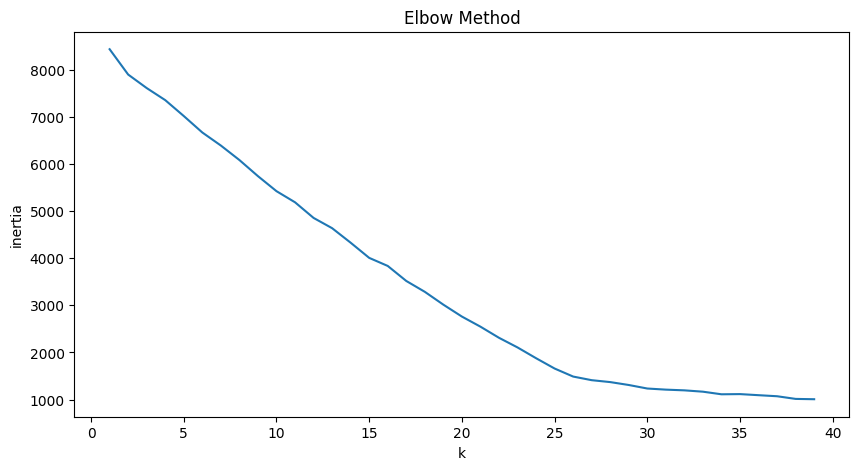

In [38]:
optimize_kmeans(data[tcols], 40)

#### 4 Apply K-Means Clustering

In [39]:
num_clusters = 25
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(data[tcols])
data['cluster'] = kmeans.labels_
data.head()

d:\aaron\Documents\GitHub\matchmadeintech\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Id,Contributions,JavaScript,Python,Java,C#,PHP,TypeScript,Ruby,C++,...,Vue-T,Assembly-T,Sass-T,CSS-T,HTML-T,Pascal-T,Racket-T,Zig-T,Other-T,cluster
Username,,,,,,,,,,,,,,,,,,,,,
mojombo,2,79,0.343363,0.0,0.0,0.0,0.0,0.447199,0.161788,0.000000,...,-0.125408,-0.090022,-0.07982,-0.307076,-0.345249,-0.058722,0.0,-0.079921,-0.425404,10
defunkt,2,1,0.718800,0.0,0.0,0.0,0.0,0.000000,0.073304,0.000000,...,-0.125408,-0.090022,-0.07982,-0.310817,-0.340875,-0.058722,0.0,-0.079921,-0.094203,14
wycats,1,358,0.516904,0.0,0.0,0.0,0.0,0.411260,0.000146,0.000000,...,-0.125408,-0.090022,-0.07982,-0.286375,0.061797,-0.058722,0.0,-0.079921,-0.565367,14
brynary,1,3483,0.011735,0.0,0.0,0.0,0.0,0.000000,0.957798,0.000000,...,-0.125408,-0.090022,-0.07982,-0.321358,-0.250432,-0.058722,0.0,-0.079921,-0.556256,6
kevinclark,1,18,0.000000,0.0,0.0,0.0,0.0,0.000000,0.227816,0.022539,...,-0.125408,-0.090022,-0.07982,-0.321358,-0.364425,-0.058722,0.0,-0.079921,-0.412393,15


## Write K-Means Model to File

In [40]:
with open('../data/kmeansmodel.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

## Write Means to File

In [41]:
mean = data.mean()
std = data.std()
with open("../data/meanAndStd.csv", "w") as f:
    f.write(",".join([x for x in col]) + "\n")
    f.write(",".join([str(mean[x]) for x in col]) + "\n")
    f.write(",".join([str(std[x]) if std[x] != 0 else "1.0" for x in col]) + "\n")


## Write Clusterized Data to File

In [42]:
clusterized_col = col + ['cluster']
with open("../data/clustered_data.csv", 'w') as f:
    f.write("Username," + ",".join([x for x in clusterized_col]) + "\n")
    for index, row in data.iterrows():
        f.write(index + "," + ",".join([str(row[x]) for x in clusterized_col]) + "\n")


## Debugging Code

In [43]:
train = data.sample(n=1)
train.drop(columns=['cluster'], inplace=True)

v = kmeans.predict(train[tcols])
v


array([22])